# Custom Template
This demo will give a short tutorial about the new feature of ESPPy - Template, and also an example to show how to build a custom template from scratch.

### Step 1 - Create a Tempalte object

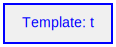

In [1]:
# Create a Tempalte object named t 

import esppy
esp = esppy.ESP('<server>:<port>')
t =  esp.Template('t')
t.to_graph(detail=True)

### Step 2: Add Windows to the Template Object

In [2]:
# Define required windows

comp_logis = esp.ComputeWindow("w_comp_logis", 
                               schema=['id*:int64', 'sentiment:string',
                                       'predicted_y:double', 'p_1:double', 'p_0:double'])
#predicted_y is actually the predicted P(sentiment = 1)
comp_logis.add_field_expression("tostring(tointeger(sentiment))")
comp_logis.add_field_expression("predicted_y")
comp_logis.add_field_expression("predicted_y")
comp_logis.add_field_expression("1-predicted_y")
 
fitstat_logis = esp.calculate.FitStat('fitstat_logis', schema=('id*:int64','mceOut:double'),
                                      classLabels='0,1',
                                      windowLength=200)
fitstat_logis.set_inputs(inputs=('p_0:double', 'p_1:double'), 
                         response=('sentiment:string'))
fitstat_logis.set_outputs(mceOut='mceOut:double')

# Add the corresponding edge
comp_logis.add_target(fitstat_logis, role='data')

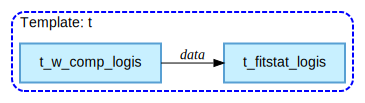

In [3]:
# Add windows to Template t
t.add_windows(comp_logis, fitstat_logis)
t.to_graph(detail=True)

In [4]:
# set input_windows and output_windows

t.input_windows=[comp_logis]
t.output_windows=[fitstat_logis]
t.input_windows, t.output_windows

('w_comp_logis', 'fitstat_logis')

### Step 3: Import Other Templates

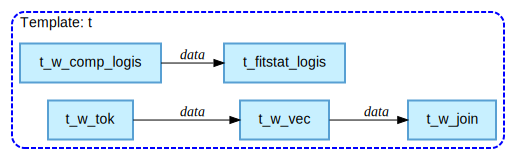

In [5]:
# Initialize a TextEmbedding Temaplate

t1 = esp.Template.TextEmbedding('t1')
t.import_template(t1)
t.to_graph(detail=True)

C:\Users\yezmao\python-esppy\esppy\templates\template.py:167: Warning:

w_join already exists in Template t, renamed to w_join1

C:\Users\yezmao\python-esppy\esppy\templates\template.py:167: Warning:

w_tok already exists in Template t, renamed to w_tok1

C:\Users\yezmao\python-esppy\esppy\templates\template.py:167: Warning:

w_vec already exists in Template t, renamed to w_vec1



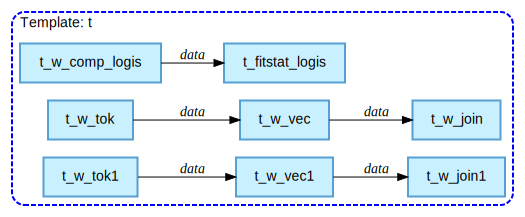

In [6]:
t.import_template(t1)
t.to_graph(detail=True)

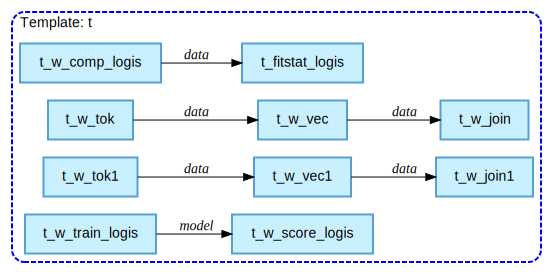

In [7]:
# Initialize a Logistic Temaplate

t2 = esp.Template.Logistic('t2')
t.import_template(t2)
t.to_graph(detail=True)

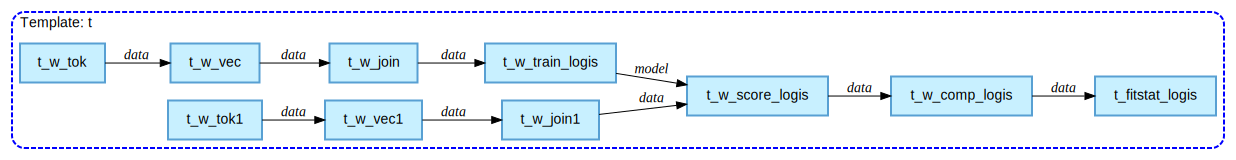

In [8]:
# Add corresponding connections

t.windows['w_join'].add_target(t.windows['w_train_logis'], role='data')
t.windows['w_score_logis'].add_target(t.windows['w_comp_logis'], role='data')
t.windows['w_join1'].add_target(t.windows['w_score_logis'], role='data')
t.to_graph(detail=True)

### Step 4: Save The Template

In [46]:
# Save the customized template to a xml file

t.save_xml('custom_template.xml')